In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [7]:
annualGoldUnitedStates = ('Resources/average_annual_gold_prices.csv')
inflationRates = ('Resources/inflation_rates_2013-2021.csv')

In [8]:
goldDf = pd.read_csv(annualGoldUnitedStates)
inflationDf = pd.read_csv(inflationRates)
United_States_inflation = inflationDf[inflationDf['country'] == 'United States']

In [12]:
def calculate_percent_change(data, year_column, value_column):
    percent_change = {}
    percent_change[data[year_column].iloc[0]] = 0
    for i in range(1, len(data)):
        old_value = data[value_column].iloc[i - 1]
        new_value = data[value_column].iloc[i]
        print(f"old_value: {old_value}, new_value: {new_value}")
        change = ((new_value - old_value) / old_value) * 100
        percent_change[data[year_column].iloc[i]] = change
    return percent_change
def United_States_inflation_creation(data):
    United_States_inflation_made = {}
    for i in range(len(data)):
        year = data['year'].iloc[i]
        inflation_rate = data['inflation rate'].iloc[i]
        United_States_inflation_made[year] = inflation_rate
    return United_States_inflation_made
United_States_Inflation_Change = United_States_inflation_creation(United_States_inflation)
percentChangeGold = calculate_percent_change(goldDf, 'Year', 'Price_Avg')

old_value: 1409.3511627906976, new_value: 1266.2542635658913
old_value: 1266.2542635658913, new_value: 1159.4084942084942
old_value: 1159.4084942084942, new_value: 1251.1232558139534
old_value: 1251.1232558139534, new_value: 1260.4684824902724
old_value: 1260.4684824902724, new_value: 1271.8906976744186
old_value: 1271.8906976744186, new_value: 1397.7829457364342
old_value: 1397.7829457364342, new_value: 1778.7185328185328
old_value: 1778.7185328185328, new_value: 1799.774031007752
old_value: 1799.774031007752, new_value: 1804.7476923076924


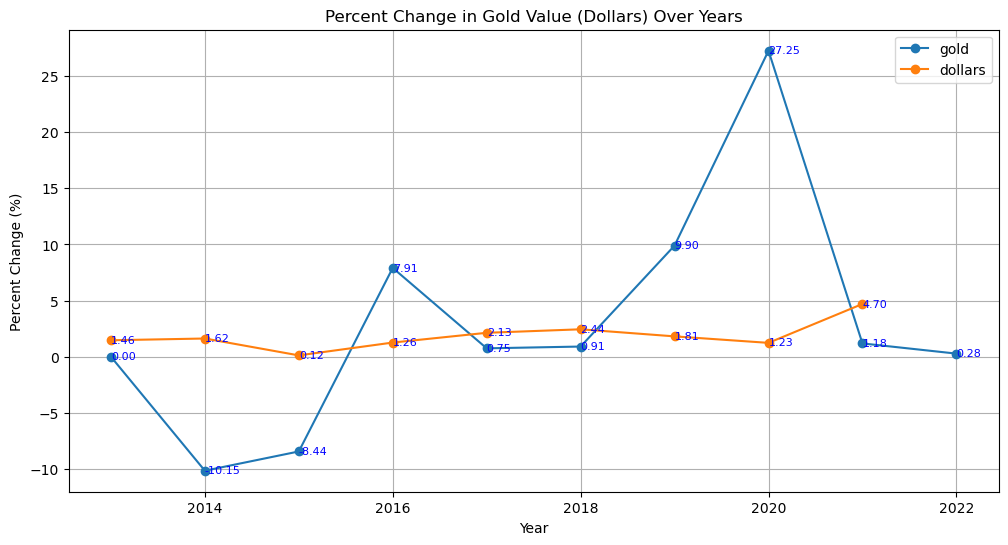

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(percentChangeGold.keys(), percentChangeGold.values(), marker='o', linestyle='-', label='gold')
plt.plot(United_States_Inflation_Change.keys(), United_States_Inflation_Change.values(), marker='o', linestyle='-', label='dollars')

for year, rate in percentChangeGold.items():
    plt.text(year, rate, f'{rate:.2f}', ha='left', va='center', fontsize=8, color='blue')
for year, rate in United_States_Inflation_Change.items():
    plt.text(year, rate, f'{rate:.2f}', ha='left', va='center', fontsize=8, color='blue')
    
plt.title('Percent Change in Gold Value (Dollars) Over Years')
plt.xlabel('Year')
plt.ylabel('Percent Change (%)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join('Plotted Charts', 'USDollarPercentages.png'))

plt.show()